In [1]:
import pandas as pd
import numpy as np
import datetime
from category_encoders import TargetEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load Data

In [2]:
df = pd.read_csv('../spotify-datasets/final_spotify_data.csv')
df_raw = df # keep copy of df

In [3]:
df.shape

(676681, 24)

In [4]:
df.columns

Index(['Unnamed: 0', 'track_id', 'track_name', 'popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness',
       'loudness', 'speechiness', 'tempo', 'valence',
       'total_available_markets', 'release_date', 'topartist_id',
       'topartist_name', 'artist_names', 'key', 'mode', 'time_signature',
       'artist_genre', 'artist_genre_list'],
      dtype='object')

In [5]:
(df_raw['popularity'] < 50).sum() / df_raw.shape[0]

0.8716115865526001

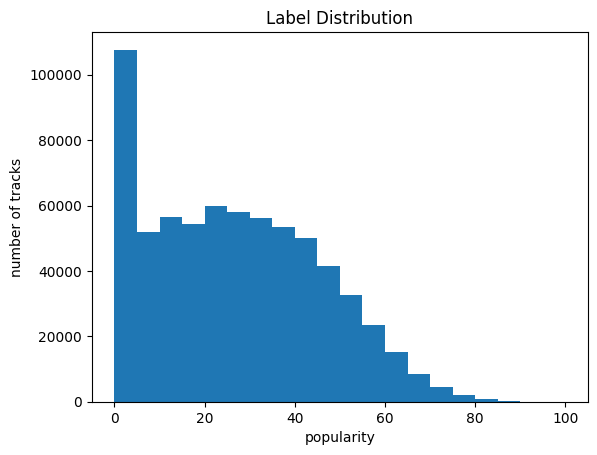

In [6]:
fig, ax = plt.subplots()
ax.hist(df_raw['popularity'], bins=20)
ax.set_xlabel('popularity')
ax.set_ylabel('number of tracks')
ax.set_title('Label Distribution')
plt.savefig('../plots/label_distribution.jpeg', dpi=300)

### Column information of non numerical columns and processing technique

| Name | Description | Preprocessing |
| :---:| :---------- | :------------ |
| Unnamed: 0 | indices of the each row | dropped |
| track_id | unique encoding of track | dropped |
| track_name | name of the track | dropped (sentiment analysis?) |
| release_date | date track was released | encode as num of days away from 2022-12-31. if only year is available, impute value as year-7-2, impute value as year-month-15 |
| topartist_id | unique encoding of artist | target encoding |
| topartist_name | name of top artist of track | drop (overlap with topartist_id)|
| artist_names | name of all artists of track | drop (overlap with topartist_id)|
| artist_genre | genre of the artist, with 5067 unique values | target encoding |
| artist_genre_list | list of artist's genre | drop | 

In [7]:
features_drop = ['Unnamed: 0', 'track_id', 'track_name', 'track_name', 'topartist_name', 'artist_names', 'artist_genre_list']
features_te = ['topartist_id', 'artist_genre']

### Encode release date

In [8]:
def date2days(date):
    if(date == '0000'):
        return None
    if(len(date.split('-')) == 1):
        date = date + "-7-2"
    if(len(date.split('-')) == 2):
        date = date + "-15"

    year, month, day = date.split('-')
    days = (datetime.datetime(2022, 12, 31) - datetime.datetime(int(year), int(month), int(day))).days
        
    return days

In [9]:
df['release_date'] = df['release_date'].apply(date2days)

### Drop features_drop

In [10]:
df = df.drop(features_drop, axis=1)

In [11]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'total_available_markets', 'release_date', 'topartist_id',
       'key', 'mode', 'time_signature', 'artist_genre'],
      dtype='object')

### Remove Null

In [12]:
df.isnull().sum()

popularity                      0
acousticness                    0
danceability                    0
duration_ms                     0
energy                          0
instrumentalness                0
liveness                        0
loudness                        0
speechiness                     0
tempo                           0
valence                         0
total_available_markets         0
release_date                  336
topartist_id                    0
key                             0
mode                            0
time_signature                  0
artist_genre               165201
dtype: int64

In [13]:
### drop null release date
df = df[df['release_date'].notnull()]

### Store cleaned data

In [15]:
df.to_csv('../spotify-datasets/final_spotify_data_cleaned.csv', index=False)